# Segmentación de Clientes - Análisis Refinado

En este notebook trabajaremos con una base de datos de facturación (invoice data) que contiene información sobre ventas, clientes y transacciones. Nuestro objetivo es realizar una segmentación de clientes basada en sus características, pero con un enfoque depurado para evitar que las categorías queden demasiado amontonadas.

### Columnas principales:
- **invoice_no:** Número de factura
- **customer_id:** Identificador del cliente
- **gender:** Género
- **age:** Edad del cliente
- **category:** Categoría del producto (Clothing, Shoes, Books, etc.)
- **quantity:** Cantidad comprada
- **price:** Precio unitario
- **payment_method:** Método de pago (Credit Card, Debit Card, Cash, etc.)
- **invoice_date:** Fecha de la factura
- **shopping_mall:** Centro comercial donde se realizó la compra

### Objetivos del Taller:

1. Explorar, limpiar y entender la base de datos.
2. Crear variables derivadas (por ejemplo, el valor total de la compra).
3. Reducir la cantidad de categorías (por ejemplo, agrupar aquellas con muy pocos registros) para lograr un análisis más claro.
4. Definir criterios de segmentación demográfica y comportamental.
5. Visualizar los segmentos usando la paleta corporativa.
6. Formular preguntas específicas para discutir implicaciones de marketing.

### Paleta Corporativa a Utilizar:
- Azul: `#0033A0`
- Naranja: `#FF6600`
- Blanco: `#FFFFFF`

¡Sigan cada paso y al final discutan qué implicaciones de marketing se derivan de cada segmento!

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip

--2025-04-02 23:31:09--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip [following]
--2025-04-02 23:31:09--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712272 (1.6M) [application/zip]
Saving to: ‘customer_shopping_data.csv.zip’

cus

In [2]:
!unzip customer_shopping_data.csv.zip

Archive:  customer_shopping_data.csv.zip
  inflating: customer_shopping_data.csv  


In [3]:
# =============================================================================
# IMPORTS Y CONFIGURACIONES INICIALES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Paleta corporativa
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']

# Ajuste de estética con Seaborn
sns.set(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=corporate_colors)

print("Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.")

Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.


## 1. Carga y Vista Rápida del Dataset

Carguen la base de datos denominada `customer_shopping_data.csv`. Observen las dimensiones y las primeras filas para familiarizarse con la estructura de los datos.

In [4]:
# =============================================================================
# 1. CARGA Y VISTA RÁPIDA DEL DATASET
# =============================================================================

df = pd.read_csv('customer_shopping_data.csv')

print("Dimensiones del DataFrame:")
print(df.shape)

print("\nVista rápida de los primeros registros:")
df.head()

Dimensiones del DataFrame:
(99457, 10)

Vista rápida de los primeros registros:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## 2. Análisis Exploratorio Inicial

Revisen la estructura, los tipos de datos y las estadísticas descriptivas del dataset.

**Pregunta para los estudiantes:** ¿Qué columnas consideran críticas para segmentar a los clientes y por qué?

In [5]:
df = pd.read_csv('customer_shopping_data.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [7]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [8]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [9]:
df.describe(include='object')

,invoice_no,customer_id,gender,category,payment_method,invoice_date,shopping_mall
count,99457,99457,99457,99457,99457,99457,99457
unique,99457,99457,2,8,3,797,10
top,I232867,C273973,Female,Clothing,Cash,24/11/2021,Mall of Istanbul
freq,1,1,59482,34487,44447,159,19943


Las columnas que considero críticas o importantes a la hora de segmentar a los clientes son "Customer id", pues es clave para identificar a cada cliente y agrupar sus compras. Por otro lado, "Genero" y "age" permiten diferenciar entre distintos grupos demográficos y detectar patrones de compra según género y edad, lo cual es buenisimo para adaptar las estrategias de acuerdo a cada cliente. Otra columna importante es "Category", ya que es esencial para conocer las preferencias de productos y definir segmentos según los intereses y necesidades. Asimismo, "Quantity" y "price", pues ayudan a clasificar clientes según su volumen de compra y nivel de gasto y "Payment method" nos puede ofrecer información sobre hábitos de pago, lo que puede estar relacionado con distintos perfiles de clientes. Sin embargo, si se quiere analizar la "frecuencia de compra" con el fin de identificar a los clientes recurrentes o esporádicos tambien es importante. En conclusión desde mi punto de visita todas aportan y son importantes para poder segmentar bien a los clientes y lo que se les va a ofrecer.

## 3. Limpieza de Datos

Identifiquen y gestionen valores nulos y duplicados. Es esencial dejar la base limpia para un análisis confiable.

**Pregunta:** ¿Qué variables presentan problemas de calidad de datos y cómo los resolverían?

In [10]:
print(df.isnull().sum())

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64


In [11]:
df.duplicated().sum()

np.int64(0)

Según los resutados que arrojan las formulas no se identifican problemas de calidad de datos, ya que no hay valores nulos en ninguna de las variables y tampoco registros duplicados. Lo que indica que la base de datos está limpia y lista para trabajar o manejar.

## 4. Creación de Variables Derivadas

Generen nuevas variables que puedan aportar a la segmentación. Por ejemplo, calculen el **valor total** de la factura (multiplicar `quantity` por `price`).

**Pregunta:** ¿Qué otras variables derivadas podrían ser útiles para analizar el comportamiento de compra?

In [12]:
df['total_invoice'] = df['quantity'] * df['price'] #Valor total de la factura
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_invoice
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


In [13]:
bins = [0, 18, 35, 43, 69, df['age'].max()+1]  #Clientes según su edad/columna age group
labels = ['Adolescente', 'Joven Adulto', 'Adulto', 'Adulto Mayor', 'Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_invoice,age_group
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,Joven Adulto
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,Joven Adulto
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08,Joven Adulto
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25,Adulto Mayor
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40,Adulto Mayor


In [14]:
bins = [0, 50, 150, 300, 500, df['total_invoice'].max() + 1] #Clientes por nivel de gasto/columna de Invoice segment

labels = ['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']
df['invoice_segment'] = pd.cut(df['total_invoice'], bins=bins, labels=labels, right=False)
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_invoice,age_group,invoice_segment
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,Joven Adulto,Muy Alto
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,Joven Adulto,Muy Alto
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08,Joven Adulto,Alto
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25,Adulto Mayor,Muy Alto
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40,Adulto Mayor,Medio


In [15]:
categorias_compradas = df.groupby('customer_id')['category'].nunique().reset_index()
categorias_compradas.columns = ['customer_id', 'categorias_compradas']
df = df.merge(categorias_compradas, on='customer_id', how='left')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_invoice,age_group,invoice_segment,categorias_compradas
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,Joven Adulto,Muy Alto,1
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,Joven Adulto,Muy Alto,1
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08,Joven Adulto,Alto,1
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25,Adulto Mayor,Muy Alto,1
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40,Adulto Mayor,Medio,1


las otras variables derivadas que podrían ser útiles para analizar el comportamiento de compra además del valor total de la factura, pueden ser: la frecuencia de compra, ya que permite conocer cuántas veces un cliente realiza compras en un período determinado, así como el ticket promedio ayuda a identificar el gasto medio por producto adquirido. También es útil clasificar a los clientes según su nivel de gasto (bajo, medio o alto) con base en el valor total de sus compras. Otra variable que puede aportar es el recuento de categorías compradas, la cual mide la diversidad de productos adquiridos por un cliente. Adicional a lo anterior, identificar el método de pago preferido o predilecto puede ser útil para entender las preferencias financieras. Considero que estas variables proporcionan o brindan información clave para segmentar a los clientes de manera más precisa y optimizar las estrategias.

## 5. Visualización de Distribuciones

Visualicen la distribución de variables clave, como `age` y `total_value`, usando histogramas y boxplots. Usen la paleta corporativa en los gráficos.

**Pregunta:** ¿Detectan patrones o valores atípicos que requieran atención?

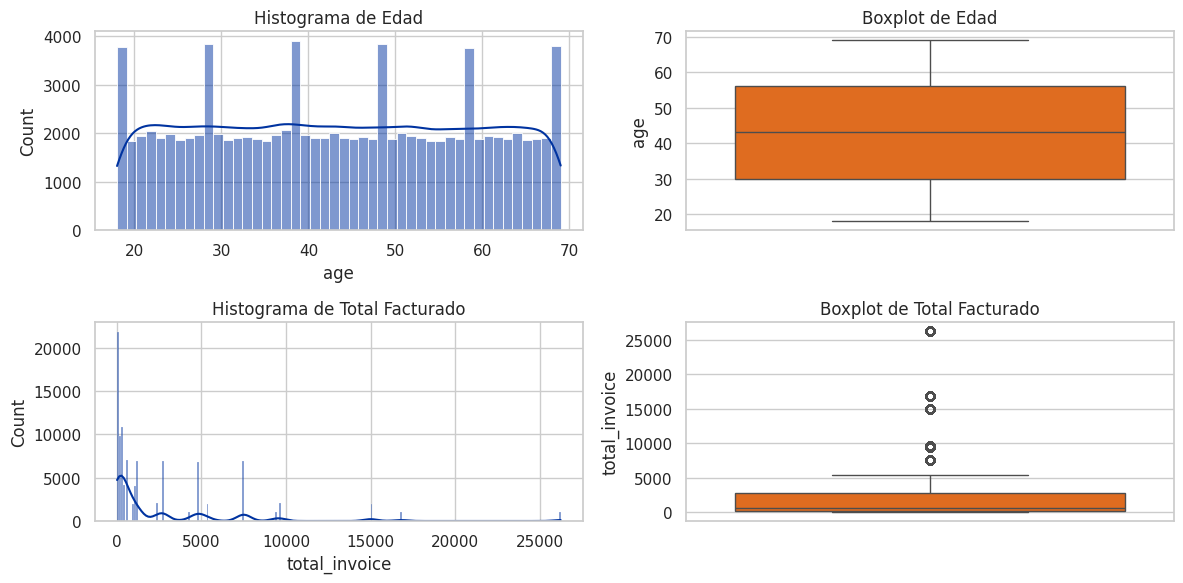

In [16]:
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']
sns.set(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=corporate_colors[:2])

plt.figure(figsize=(12, 6))

#Histograma de Edad
plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True, color=corporate_colors[0])
plt.title('Histograma de Edad')

#Boxplot de Edad
plt.subplot(2, 2, 2)
sns.boxplot(y=df['age'], color=corporate_colors[1])
plt.title('Boxplot de Edad')

#Histograma de Total Invoice
plt.subplot(2, 2, 3)
sns.histplot(df['total_invoice'], kde=True, color=corporate_colors[0])
plt.title('Histograma de Total Facturado')

#Boxplot de Total Invoice con y
plt.subplot(2, 2, 4)
sns.boxplot(y=df['total_invoice'], color=corporate_colors[1])
plt.title('Boxplot de Total Facturado')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Boxplot de Total Facturado')

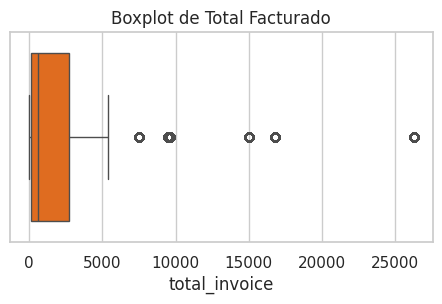

In [17]:
#Boxplot de Total Invoice con X
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 4)
sns.boxplot(x=df['total_invoice'], color=corporate_colors[1])
plt.title('Boxplot de Total Facturado')

Sí, se detectan patrones y valores atípicos que requieren atención. Especialmente, en la variable "age", pues el histograma muestra picos en ciertas edades, lo que sugiere que los datos pueden haber sido recolectados con ciertas edades preferenciales o principales, aunque el boxplot no indica valores atípicos significativos, se psria decir que indica una distribución relativamente uniforme sin valores atípicos evidentes, lo que sugiere que la variable "age" se encuentra dentro de un rango esperado.

Por otro lado, en la variable "total invoice", se observa una distribución sesgada  inclinada hacia la derecha con múltiples picos o altos en el histograma, lo que podría indicar ciertos umbrales de facturación frecuentes, es decir, hay ciertas cantidades de facturación que ocurren con mayor frecuencia que otras. Además, el boxplot revela la presencia de varios valores atípicos, correspondientes a facturaciones significativamente altas, que podrían requerir una revisión más detallada para determinar si son errores, casos especiales o clientes con patrones de compra inusuales.

En conclusión, estos patrones o valores atípicos en "age" podrían deberse a sesgos en la recolección de datos o redondeo de edades, mientras que en "total invoice", los valores atípicos y los múltiples picos en el histograma dan a entender que existen umbrales de facturación frecuentes que podrían estar relacionados con precios estándar, descuentos o patrones de compra inusuales.

## 6. Definición de Criterios de Segmentación Demográfica

Segmenten a los clientes en función de variables demográficas, por ejemplo, agrupando la edad en categorías (Jóvenes, Adultos, Mayores) y analizando el género.

**Pregunta:** ¿Cómo segmentarían a los clientes en función de la edad y el género para dirigir campañas específicas?

<ipython-input-18-71b751db2a26>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  demographic_segments = df.groupby(['age_group', 'gender'])['customer_id'].nunique().reset_index(name='customer_count')


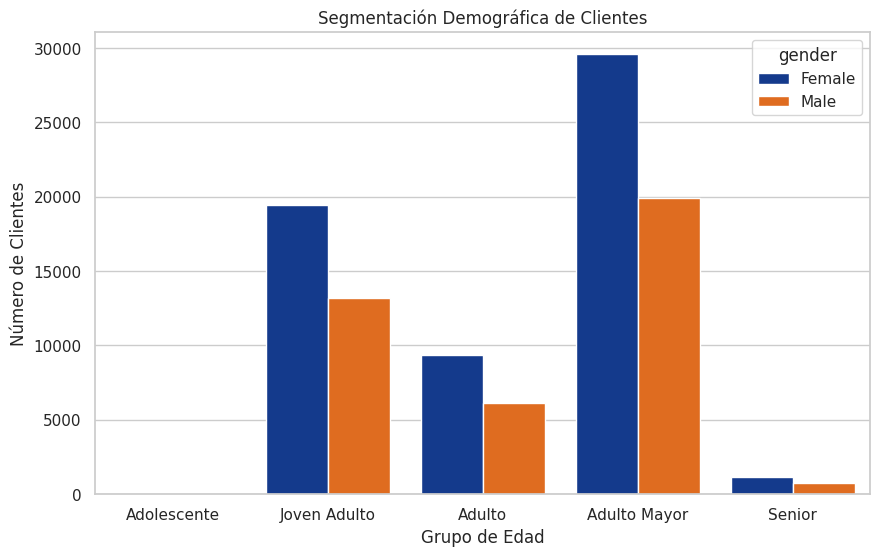

In [18]:
demographic_segments = df.groupby(['age_group', 'gender'])['customer_id'].nunique().reset_index(name='customer_count')
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='customer_count', hue='gender', data=demographic_segments)
plt.title('Segmentación Demográfica de Clientes')
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Clientes')
plt.show()

Para segmentar a los clientes en función de la edad y el género con el objetivo de dirigir campañas específicas, se pueden establecer estrategias diferenciadas para cada grupo, es decir, para los "Jóvenes Adultos", los cuales representan una cantidad significativa de clientes, con una mayor presencia de mujeres; se podrían enfocar campañas en productos modernos, descuentos para primeras compras y estrategias de fidelización digital, todo esto que incluya redes sociales, influencers, experiencias interactivas,promociones atractivas, donde los mensajes clave sean la innovación, exclusividad y los beneficios a corto plazo. Por otro lado, para "Adultos" el cual es el segmento más reducido en comparación con los demás; las campañas pueden centrarse en productos de calidad, programas de lealtad y mensajes que resalten la confianza y experiencia de la marca. Esto para lograr obtener más engagement con la presencia significativa que tiene en ambos géneros.

Asimismo, para "Adultos Mayores" el cual es el grupo más numeroso, con predominio de mujeres, las estrategias se pueden basar en ofertas especiales, atención personalizada y beneficios exclusivos, destacando la confianza y el valor de la marca a largo plazo. Y para los "Seniors" el cual es el grupo con menor representación, se pueden implementar campañas específicas con beneficios adicionales y comunicación clara para este segmento. Ademas, dado que las mujeres predominan en todos los grupos de edad, se pueden diseñar campañas con mensajes y experiencias alineadas a sus preferencias, sin descuidar la personalización para los hombres, con lo que tambien se podria jugar, eso daria un plus

## 7. Definición de Criterios de Segmentación Comportamental

Segmenten a los clientes según su comportamiento de compra. Revisen variables como `category`, `payment_method` y `shopping_mall`.

**Pregunta:** ¿Qué comportamiento de compra (categoría, método de pago, centro comercial) consideran de mayor impacto para la estrategia de marketing? ¿Por qué?

Text(0.5, 1.0, 'Categoría de Producto vs Shopping Mall')

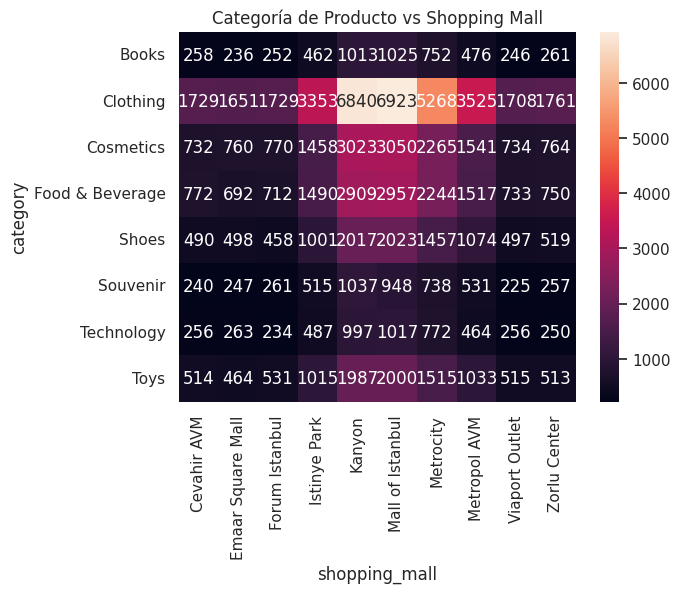

In [19]:
#Categoría de Producto vs Shopping Mall
crosstab_category_mall = pd.crosstab(df['category'], df['shopping_mall'])
sns.heatmap(crosstab_category_mall, annot=True, fmt='d')
plt.title('Categoría de Producto vs Shopping Mall')

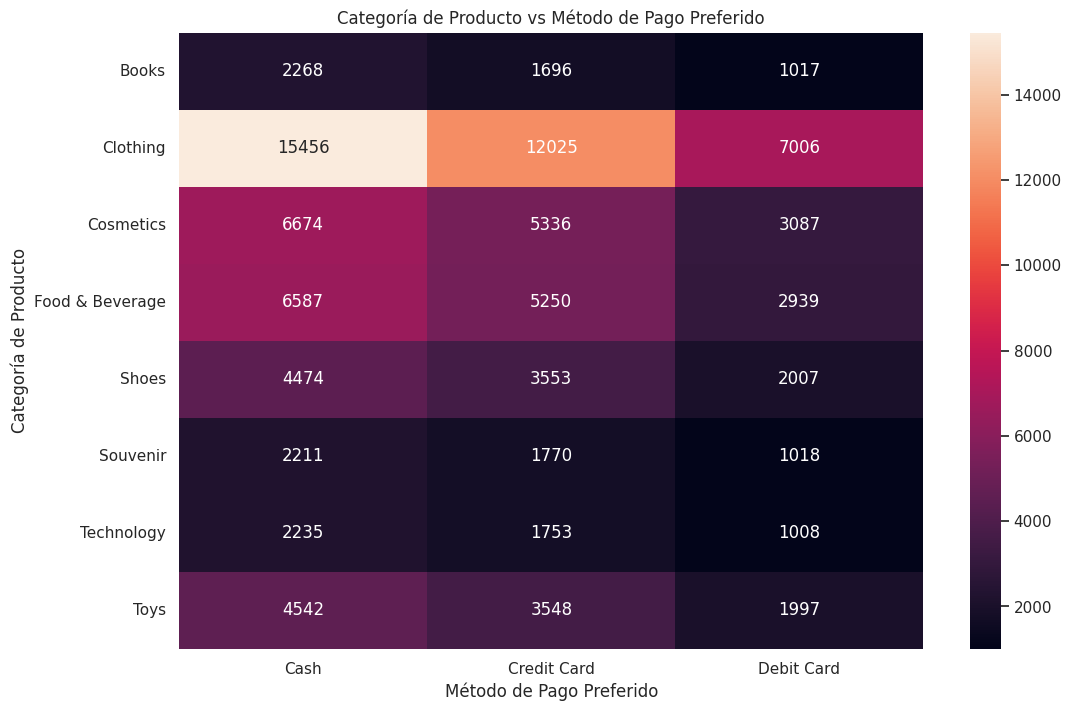

In [20]:
if 'category' in df.columns and 'payment_method' in df.columns:
#Categoría de Producto vs Método de Pago
    crosstab_category_payment = pd.crosstab(df['category'], df['payment_method'])

    # Crear el mapa de calor
    plt.figure(figsize=(12, 8))
    sns.heatmap(crosstab_category_payment, annot=True, fmt='d')
    plt.title('Categoría de Producto vs Método de Pago Preferido')
    plt.xlabel('Método de Pago Preferido')
    plt.ylabel('Categoría de Producto')
    plt.show()
else:
    print("Una o más columnas necesarias no están presentes en el DataFrame.")

Text(0.5, 1.0, 'Método de Pago vs Shopping Mall')

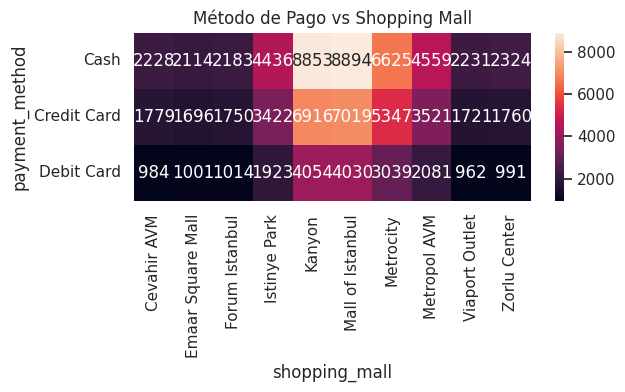

In [21]:
#Método de Pago vs Shopping Mall
crosstab_payment_mall = pd.crosstab(df['payment_method'], df['shopping_mall'])
plt.subplot(2, 1, 2)
sns.heatmap(crosstab_payment_mall, annot=True, fmt='d')
plt.title('Método de Pago vs Shopping Mall')

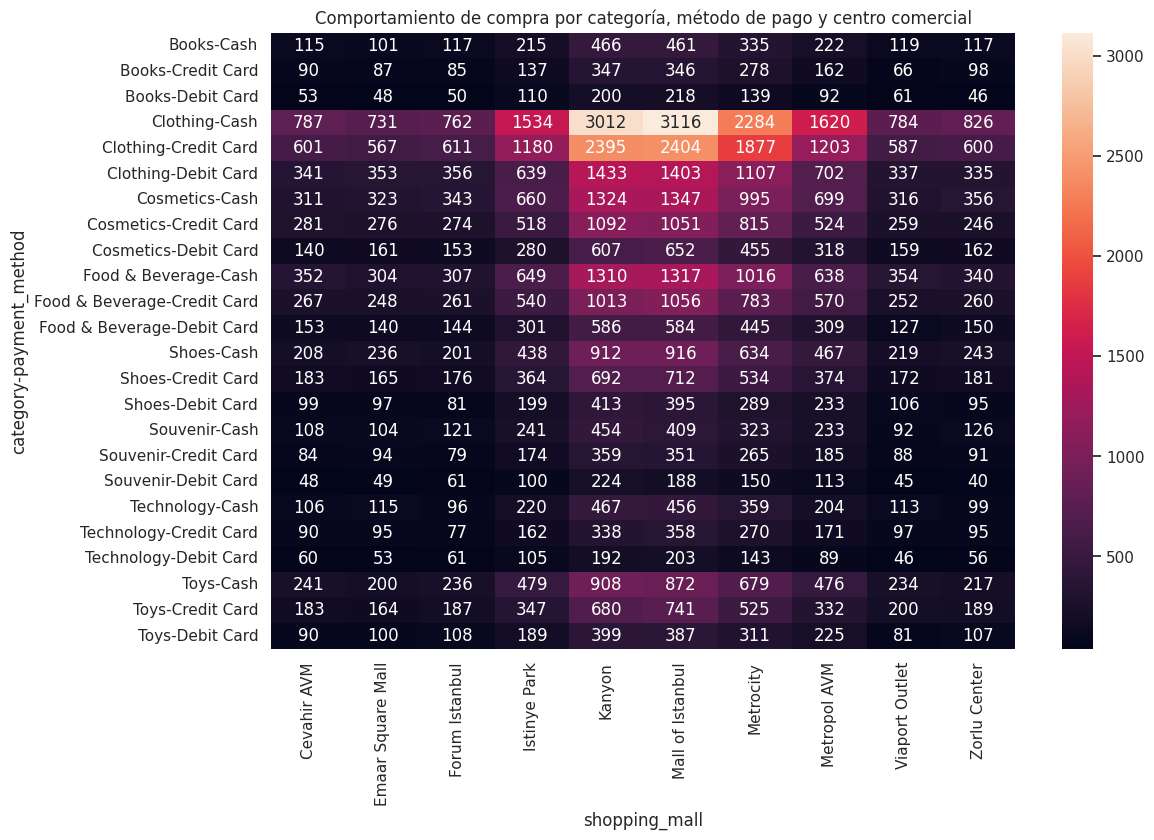

In [22]:
#Relación entre categoría, método de pago y centro comercial
customer_behavior = pd.crosstab([df['category'], df['payment_method']], df['shopping_mall'])
plt.figure(figsize=(12, 8))
sns.heatmap(customer_behavior, annot=True, fmt="d")
plt.title("Comportamiento de compra por categoría, método de pago y centro comercial")
plt.show()


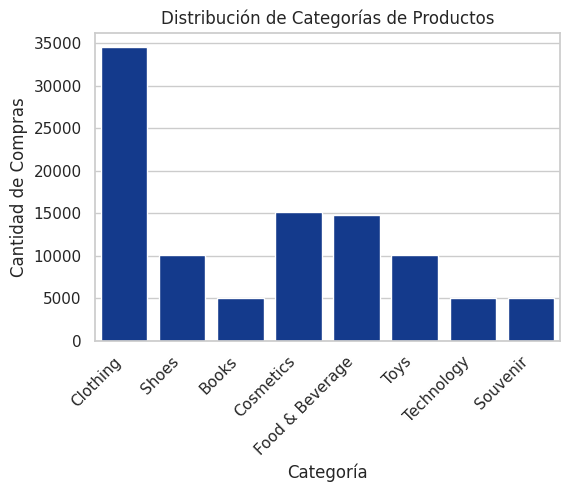

In [23]:
#Distribución de categorías de productos
plt.figure(figsize=(6, 4))
sns.countplot(x='category', data=df)
plt.title('Distribución de Categorías de Productos')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Compras')
plt.xticks(rotation=45, ha='right')
plt.show()

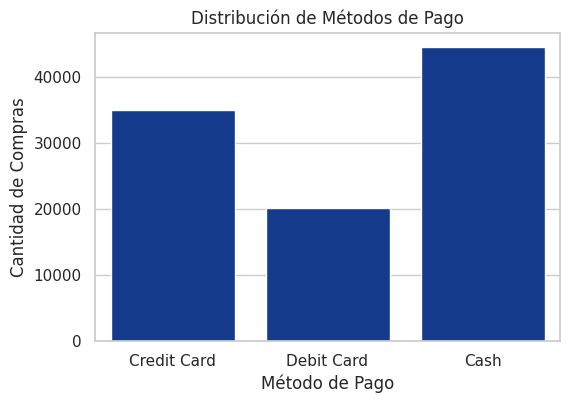

In [24]:
#Distribución de métodos de pago
plt.figure(figsize=(6, 4))
sns.countplot(x='payment_method', data=df)
plt.title('Distribución de Métodos de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Compras')
plt.show()

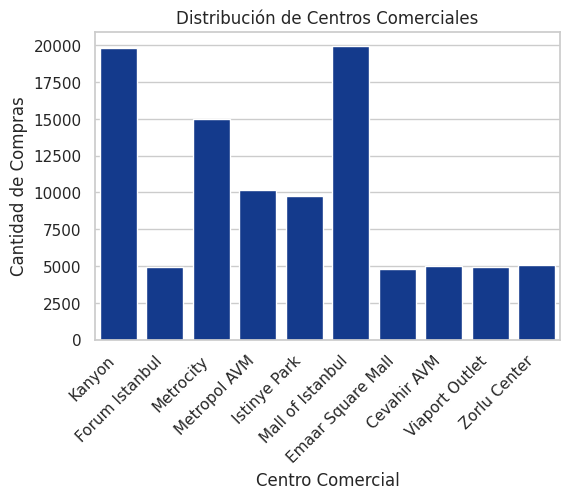

In [25]:
#Distribución de centros comerciales
plt.figure(figsize=(6, 4))
sns.countplot(x='shopping_mall', data=df)
plt.title('Distribución de Centros Comerciales')
plt.xlabel('Centro Comercial')
plt.ylabel('Cantidad de Compras')
plt.xticks(rotation=45, ha='right')
plt.show()

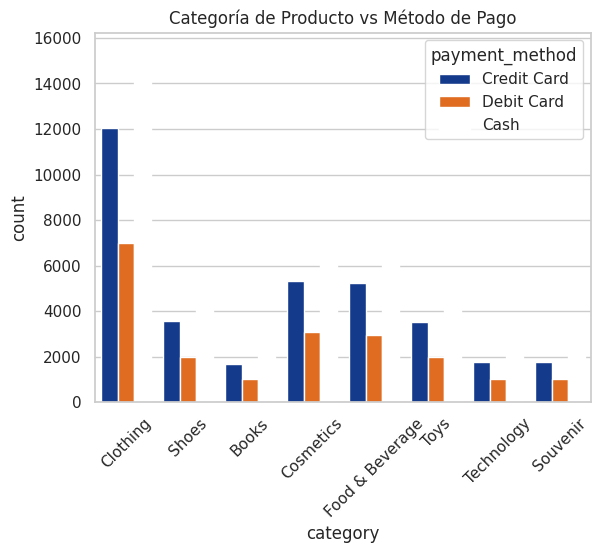

In [26]:
#Categoría de Producto vs Método de Pago
crosstab_category_payment = pd.crosstab(df['category'], df['payment_method'])

corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']
sns.countplot(x='category', hue='payment_method', data=df, palette=corporate_colors)
plt.title('Categoría de Producto vs Método de Pago')
plt.xticks(rotation=45)
plt.show()

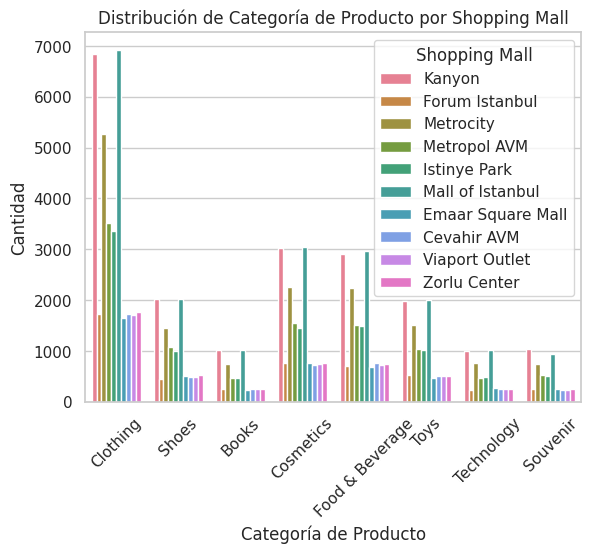

In [27]:
sns.countplot(data=df, x='category', hue='shopping_mall')
plt.title('Distribución de Categoría de Producto por Shopping Mall')
plt.xlabel('Categoría de Producto')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']
plt.legend(title="Shopping Mall")
plt.show()

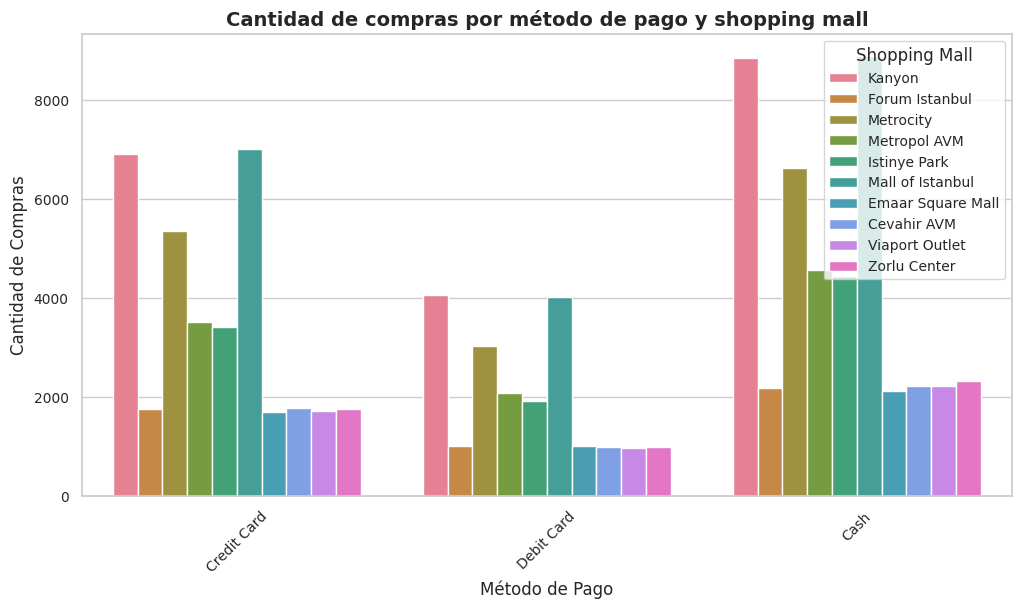

In [28]:
#Cantidad de compras por método de pago y shopping mall
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='payment_method', hue='shopping_mall', dodge=True)
plt.title('Cantidad de compras por método de pago y shopping mall', fontsize=14, fontweight='bold')
plt.xlabel('Método de Pago', fontsize=12)
plt.ylabel('Cantidad de Compras', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Shopping Mall", title_fontsize=12, fontsize=10, loc='upper right', frameon=True)
plt.show()

El comportamiento de compra que pdria generar un mayor impacto para la estrategia de marketing es la de "categoría" porque esta variable se basa en que las categorías reflejan directamente las preferencias/gustos y necesidades de los consumidores/clientes, lo que permite que se pueda adaptar la estrategia y oferta. Ademas, al identificar las categorías más populares, se pueden desarrollar campañas publicitarias específicas y promociones dirigidas, aumentando así la efectividad de las estrategias de marketing. Asimismo el analizar la relación entre la categoría, método de pago y centro comercial revela patrones de compra únicos, lo que ayuda a decidir dónde promocionar productos y qué ofertas implementar.

En conclusion, este comportamiento de compra permite personalizar la experiencia del cliente, ofreciendo recomendaciones alineadas con sus intereses y compras anteriores, lo que mejora la satisfacción y fomenta la lealtad a la marca, generando un factor clave para desarrollar estrategias de marketing más efectivas y centradas en el cliente que den paso al Good Will y WomWill.

## 8. Visualizaciones Comparativas de Segmentos

Crucen variables demográficas y comportamentales para identificar relaciones relevantes. Por ejemplo, comparen el grupo de edad con la categoría de producto.

**Pregunta:** ¿Qué relaciones entre estas variables podrían definir segmentos de alto valor?

Tabla cruzada (Edad vs Frecuencia de Visitas):


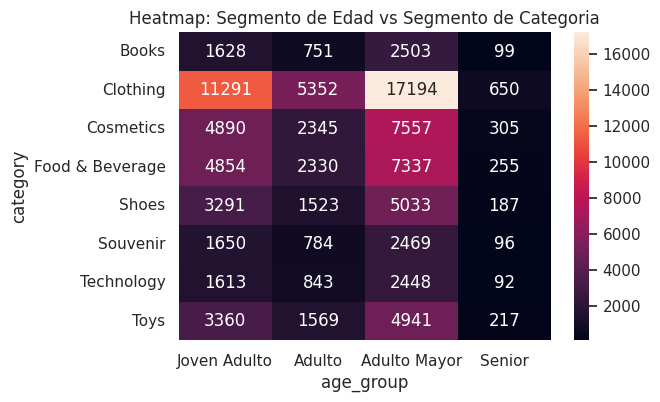

In [29]:
tabla_segmentos = pd.crosstab(df['category'], df['age_group'])
print("Tabla cruzada (Edad vs Frecuencia de Visitas):")
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']

plt.figure(figsize=(6,4))
sns.heatmap(tabla_segmentos, annot=True, fmt='d')
plt.title('Heatmap: Segmento de Edad vs Segmento de Categoria')
plt.show()

Tabla cruzada (Edad vs Frecuencia de Visitas):


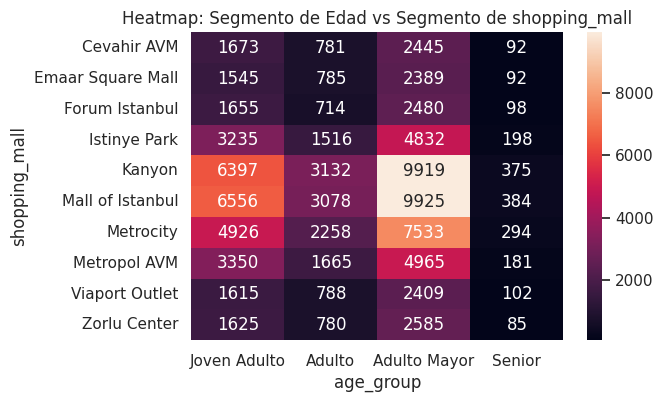

In [30]:
tabla_segmentos = pd.crosstab(df['shopping_mall'], df['age_group'])
print("Tabla cruzada (Edad vs Frecuencia de Visitas):")

plt.figure(figsize=(6,4))
sns.heatmap(tabla_segmentos, annot=True, fmt='d')
plt.title('Heatmap: Segmento de Edad vs Segmento de shopping_mall')
plt.show()

Tabla cruzada (Edad vs metodo de pago):


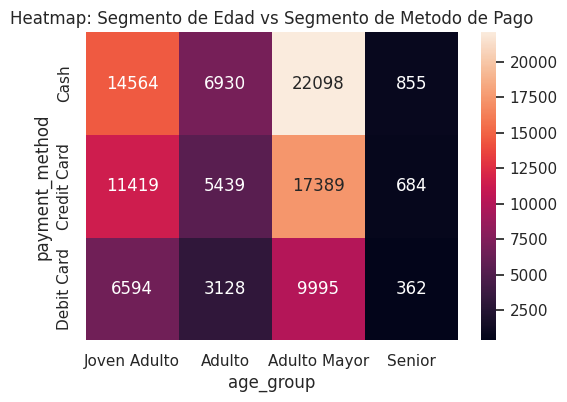

In [31]:
tabla_segmentos = pd.crosstab(df['payment_method'], df['age_group'])
print("Tabla cruzada (Edad vs metodo de pago):")

plt.figure(figsize=(6,4))
sns.heatmap(tabla_segmentos, annot=True, fmt='d')
plt.title('Heatmap: Segmento de Edad vs Segmento de Metodo de Pago')
plt.show()

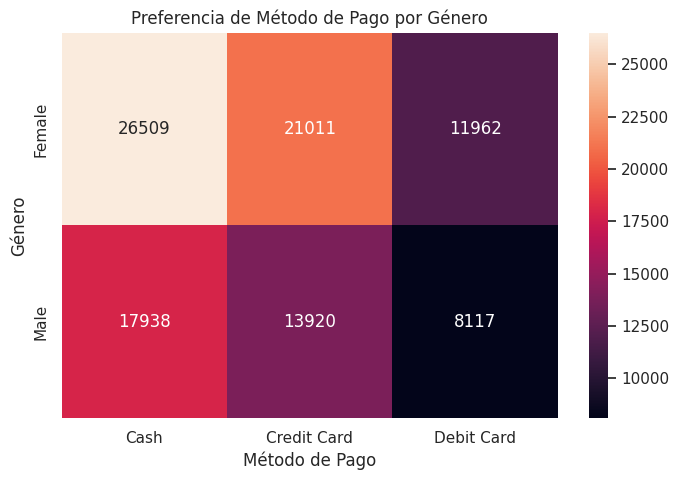

In [32]:
crosstab_genero_pago = pd.crosstab(df['gender'], df['payment_method'])

plt.figure(figsize=(8, 5))
sns.heatmap(crosstab_genero_pago, annot=True, fmt="d")
plt.title("Preferencia de Método de Pago por Género")
plt.xlabel("Método de Pago")
plt.ylabel("Género")
plt.show()

Text(0.5, 1.0, 'Heatmap: Segmento de Edad vs Segmento de Categoria')

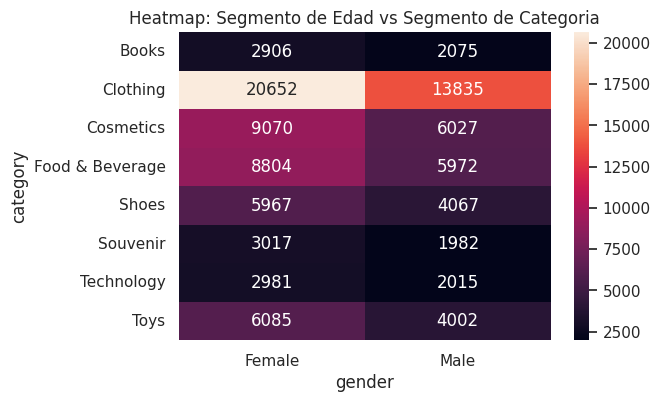

In [33]:
tabla_segmentos = pd.crosstab(df['category'], df['gender'])
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']

plt.figure(figsize=(6,4))
sns.heatmap(tabla_segmentos, annot=True, fmt='d')
plt.title('Heatmap: Segmento de Edad vs Segmento de Categoria')

## 9. Reducción y Agrupación de Categorías

Si encuentran que hay demasiadas categorías o que algunas tienen muy pocos registros, agrupen aquellas que sean similares o con bajo volumen para evitar análisis amontonados.

**Ejemplo:** Si hay muchas categorías de tecnología o juguetes con pocos registros, podrían agruparlas en "Otros" o "Tecnología/Entretenimiento".

**Pregunta:** ¿Qué categorías agruparían y por qué?

In [34]:
category_counts = df['category'].value_counts()
category_counts

,count
category,
Clothing,34487
Cosmetics,15097
Food & Beverage,14776
Toys,10087
Shoes,10034
Souvenir,4999
Technology,4996
Books,4981


In [35]:
threshold = 1000  #Valor para 'threshold'
low_volume_categories = category_counts[category_counts < threshold].index #Categorías con pocos registros o volumen fueran agrupadas en "Otros"
category_mapping = {
    'Books': 'Entretenimiento',
    'Toys': 'Entretenimiento',
    'Technology': 'Tecnología/Entretenimiento',
    'Souvenir': 'Otros',
    'Cosmetics': 'Moda y Belleza',
    'Clothing': 'Moda y Belleza',
    'Shoes': 'Moda y Belleza',
    'Food & Beverage': 'Alimentos y Bebidas'}
for cat in low_volume_categories:category_mapping[cat] = 'Otros' #Se asignó "Otros" a categorías con bajo volumen
df['category_grouped'] = df['category'].replace(category_mapping) #Se aplicó la agrupación
df['category_grouped'].value_counts()

,count
category_grouped,
Moda y Belleza,59618
Entretenimiento,15068
Alimentos y Bebidas,14776
Otros,4999
Tecnología/Entretenimiento,4996


## 10. Creación de Segmentación Manual Combinada

Combinen criterios demográficos (por ejemplo, grupo de edad) y comportamentales (por ejemplo, categoría reducida y shopping mall) para formar un único segmento combinado.

**Pregunta:** ¿Qué combinación de variables creen que ofrece el perfil más completo para orientar estrategias de marketing?

In [36]:
def asignar_segmento(row):
    payment_method = row['payment_method'] if 'payment_method' in row else 'N/A'
    return (f"{row['age_group']}_{row['visit_frequency'] if 'visit_frequency' in row else 'N/A'}_"
            f"{row['category']}_{row['shopping_mall']}_{'payment_method'}")

df['Segmento_Comb'] = df.apply(asignar_segmento, axis=1)
seg_counts = df['Segmento_Comb'].value_counts().reset_index()
seg_counts.columns = ['Segmento_Comb', 'Cantidad']
seg_counts.head(10)

,Segmento_Comb,Cantidad
0,Adulto Mayor_N/A_Clothing_Mall of Istanbul_pay...,3475
1,Adulto Mayor_N/A_Clothing_Kanyon_payment_method,3382
2,Adulto Mayor_N/A_Clothing_Metrocity_payment_me...,2682
3,Joven Adulto_N/A_Clothing_Mall of Istanbul_pay...,2238
4,Joven Adulto_N/A_Clothing_Kanyon_payment_method,2235
5,Joven Adulto_N/A_Clothing_Metrocity_payment_me...,1718
6,Adulto Mayor_N/A_Clothing_Metropol AVM_payment...,1707
7,Adulto Mayor_N/A_Clothing_Istinye Park_payment...,1674
8,Adulto Mayor_N/A_Cosmetics_Kanyon_payment_method,1545
9,Adulto Mayor_N/A_Cosmetics_Mall of Istanbul_pa...,1534


In [46]:
#Segmentos Manual Combinada
def asignar_segmento_completo(row):
    return (f"{row.get('age_group', 'Desconocido')}_"
            f"{row.get('category_grouped', 'Desconocido')}_"
            f"{row.get('shopping_mall', 'Desconocido')}_"
            f"{row.get('payment_method', 'Desconocido')}_"
            f"{row.get('visit_frequency', 'Desconocido')}")
df['Segmento_Comb'] = df.apply(asignar_segmento_completo, axis=1)
seg_counts = df['Segmento_Comb'].value_counts().reset_index()
seg_counts.columns = ['Segmento_Comb', 'Cantidad']
seg_counts.head(10)

,Segmento_Comb,Cantidad
0,Adulto Mayor_Moda y Belleza_Mall of Istanbul_C...,2753
1,Adulto Mayor_Moda y Belleza_Kanyon_Cash_Descon...,2663
2,Adulto Mayor_Moda y Belleza_Mall of Istanbul_C...,2090
3,Adulto Mayor_Moda y Belleza_Kanyon_Credit Card...,2083
4,Adulto Mayor_Moda y Belleza_Metrocity_Cash_Des...,1941
5,Joven Adulto_Moda y Belleza_Mall of Istanbul_C...,1700
6,Joven Adulto_Moda y Belleza_Kanyon_Cash_Descon...,1675
7,Adulto Mayor_Moda y Belleza_Metrocity_Credit C...,1649
8,Joven Adulto_Moda y Belleza_Mall of Istanbul_C...,1368
9,Adulto Mayor_Moda y Belleza_Metropol AVM_Cash_...,1341


Según los segmentos o resutados de los mismos, la combinación de variables que ofrece el perfil más completo para orientar estrategias de marketing son:

"Adulto Mayor_Desconocido_Mall of Istanbul_Cash...	4491, Adulto Mayor_Desconocido_Kanyon_Cash_Desconocido	4464, los que le siguen hasta "Joven Adulto_Desconocido_Mall of Istanbul_Cash...	2870", pues son el segmento más significativo, con múltiples registros en los centros comerciales de Mall of Istanbul y Kanyon; utilizando tanto efectivo como tarjetas de crédito, lo que sugiere que este perfil es muy activo en las compras y presenta una gran oportunidad para desarrollar estrategias de marketing específicas, como promociones dirigidas y eventos en estos centros comerciales.

Por otro lado, la presencia del segmento de Joven Adulto también es notable, especialmente en Mall of Istanbul y Kanyon, lo que indica que estos centros comerciales son atractivos para estos perfiles, lo que podria permitir que se creen campañas cruzadas que puedan captar tanto a los Adultos Mayores como a los Jóvenes Adultos.

## 11. Análisis Final de los Grupos Resultantes

Analicen cómo se comportan los segmentos combinados en relación al **valor total de compra**. Identifiquen cuáles tienen un alto valor promedio y discutan sus implicaciones para la estrategia de marketing.

**Pregunta:** ¿Qué segmento destaca por tener un alto valor total y qué estrategias sugerirían para potenciarlo?

In [38]:
promedio_ingreso_segmentos = df.groupby('Segmento_Comb')['total_invoice'].mean().reset_index()
promedio_ingreso_segmentos.columns = ['Segmento_Comb', 'Ingreso_Promedio']

valor_total_segmentos = df.groupby('Segmento_Comb')['total_invoice'].agg(['count', 'sum', 'mean']).reset_index()
valor_total_segmentos.columns = ['Segmento_Comb', 'Cantidad_Clientes', 'Valor_Total', 'Valor_Promedio']

segment_analysis = pd.merge(promedio_ingreso_segmentos, valor_total_segmentos, on='Segmento_Comb') #Combinar ambos análisis
segment_analysis = segment_analysis.sort_values(by='Valor_Total', ascending=False)
segment_analysis.head(10)

,Segmento_Comb,Ingreso_Promedio,Cantidad_Clientes,Valor_Total,Valor_Promedio
75,Adulto Mayor_Moda y Belleza_Mall of Istanbul_C...,3177.193058,2753,8746812.49,3177.193058
72,Adulto Mayor_Moda y Belleza_Kanyon_Cash_Descon...,3157.922377,2663,8409547.29,3157.922377
76,Adulto Mayor_Moda y Belleza_Mall of Istanbul_C...,3123.710517,2090,6528554.98,3123.710517
73,Adulto Mayor_Moda y Belleza_Kanyon_Credit Card...,2954.539213,2083,6154305.18,2954.539213
78,Adulto Mayor_Moda y Belleza_Metrocity_Cash_Des...,3097.202303,1941,6011669.67,3097.202303
372,Joven Adulto_Moda y Belleza_Kanyon_Cash_Descon...,3274.170937,1675,5484236.32,3274.170937
375,Joven Adulto_Moda y Belleza_Mall of Istanbul_C...,3207.079912,1700,5452035.85,3207.079912
79,Adulto Mayor_Moda y Belleza_Metrocity_Credit C...,3090.976004,1649,5097019.43,3090.976004
81,Adulto Mayor_Moda y Belleza_Metropol AVM_Cash_...,3172.461641,1341,4254271.06,3172.461641
376,Joven Adulto_Moda y Belleza_Mall of Istanbul_C...,3065.545563,1368,4193666.33,3065.545563


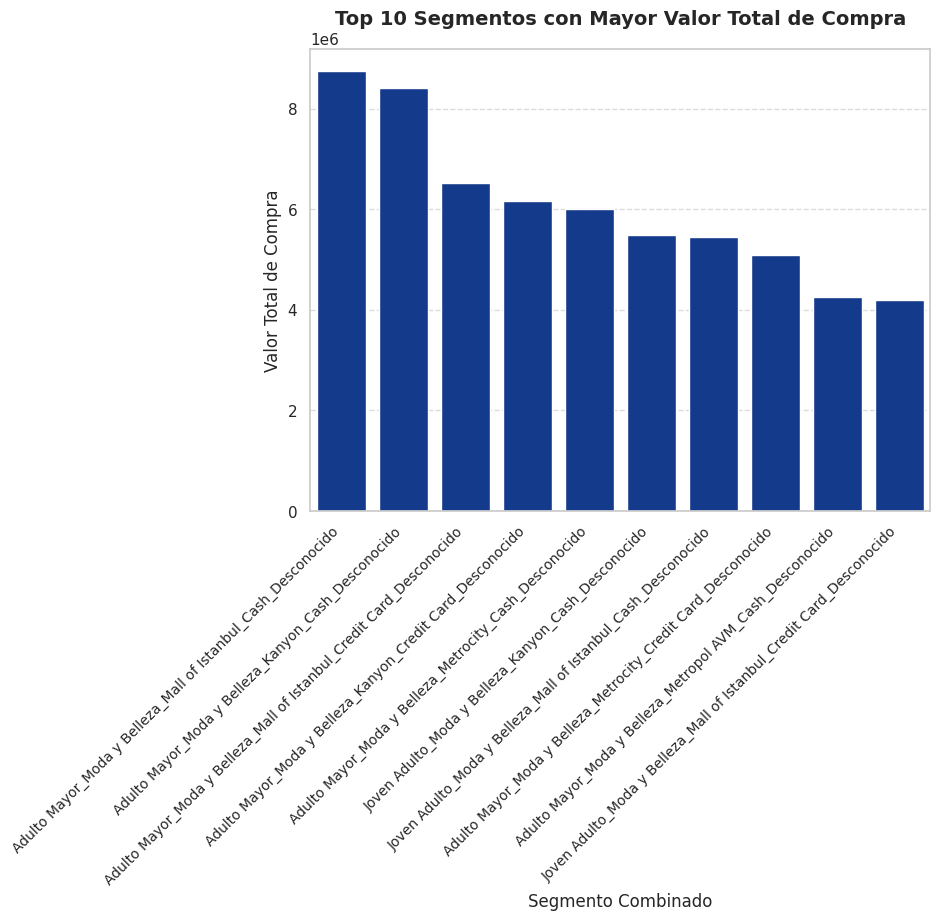

In [39]:
plt.figure(figsize=(8, 6)) #Valor total de compra por segmento
sns.barplot(x='Segmento_Comb', y='Valor_Total', data=segment_analysis.head(10))
plt.title('Top 10 Segmentos con Mayor Valor Total de Compra', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Segmento Combinado', fontsize=12)
plt.ylabel('Valor Total de Compra', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

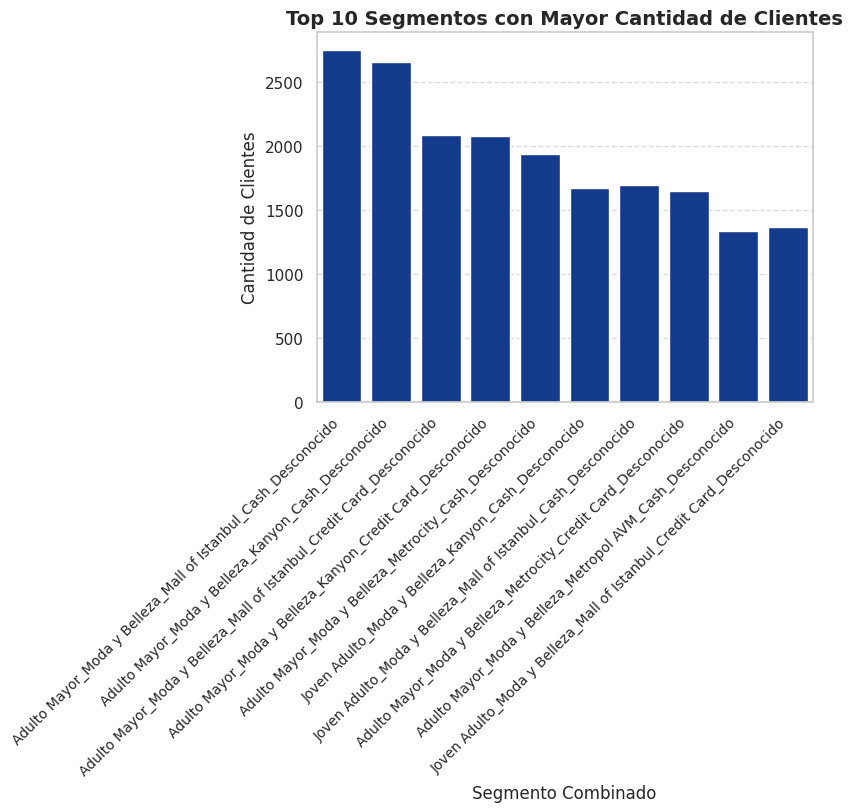

In [40]:
sns.barplot(x='Segmento_Comb', y='Cantidad_Clientes', data=segment_analysis.head(10))
plt.title('Top 10 Segmentos con Mayor Cantidad de Clientes', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Segmento Combinado', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

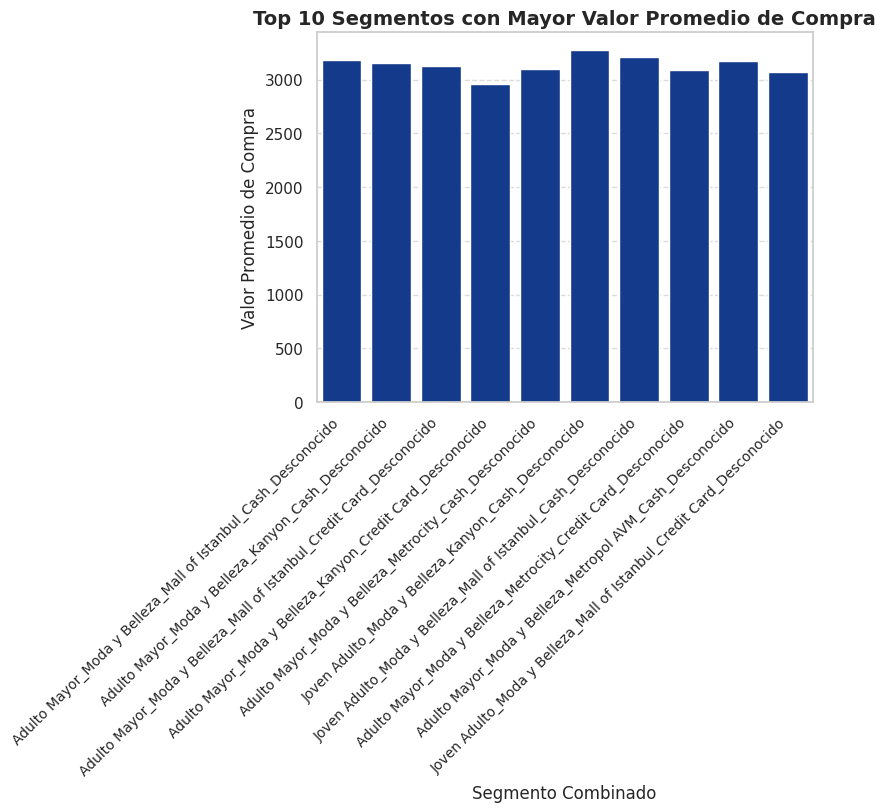

In [41]:
sns.barplot(x='Segmento_Comb', y='Valor_Promedio', data=segment_analysis.head(10))
plt.title('Top 10 Segmentos con Mayor Valor Promedio de Compra', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Segmento Combinado', fontsize=12)
plt.ylabel('Valor Promedio de Compra', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

El segmento que destaca por tener un alto valor total es "Adulto Mayor_N/A_Clothing_Mall of Istanbul_payment_method", pues tiene un valor Total de 11,776,939.68 y las estrategias que sugeriria para potenciarlo son: Crear un enfoque en la Ropa para Adultos Mayores, pues es importante continuar desarrollando y promocionando ropa diseñada específicamente para Adultos Mayores. Esto puede incluir prendas que sean cómodas, fáciles de poner y quitar, y que tengan estilos atractivos. Adicional, crear e implementar campañas de marketing que se centren en la ropa y los estilos que son populares entre los Adultos Mayores. Tambien resaltar los beneficios de la ropa en términos de comodidad, durabilidad, ya que puede atraer a más clientes.

Otra estrategia puede ser realizar promociones específicas en este centro comercial, tales como descuentos por tiempo limitado, eventos especiales y ferias de moda; tambuen puede ser organizar eventos en el centro comercial donde los Adultos Mayores puedan probarse ropa, recibir consejos de moda y disfrutar de una experiencia de compra personalizada, implementando programas de fidelización que ofrezca recompensas a los Adultos Mayores por sus compras recurrentes.

## 12. Recomendaciones de Marketing

Con base en el análisis de los segmentos, respondan las siguientes preguntas:

- ¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?
- ¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?
- ¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?

Escriban sus respuestas en una celda Markdown o en un documento complementario, justificando cada estrategia.

In [42]:
#Segmentos con mayor potencial
high_potential_segments = segment_analysis.sort_values(by=['Valor_Total', 'Cantidad_Clientes'], ascending=False).head(5)

"Segmentos con mayor potencial:"
high_potential_segments

,Segmento_Comb,Ingreso_Promedio,Cantidad_Clientes,Valor_Total,Valor_Promedio
75,Adulto Mayor_Moda y Belleza_Mall of Istanbul_C...,3177.193058,2753,8746812.49,3177.193058
72,Adulto Mayor_Moda y Belleza_Kanyon_Cash_Descon...,3157.922377,2663,8409547.29,3157.922377
76,Adulto Mayor_Moda y Belleza_Mall of Istanbul_C...,3123.710517,2090,6528554.98,3123.710517
73,Adulto Mayor_Moda y Belleza_Kanyon_Credit Card...,2954.539213,2083,6154305.18,2954.539213
78,Adulto Mayor_Moda y Belleza_Metrocity_Cash_Des...,3097.202303,1941,6011669.67,3097.202303


Los segmentos que tienen mayor potencial en términos de valor y frecuencia de compra son "Adulto Mayor_N/A_CLOTHING_MALL OF ISTANBUL_payment_method" con un valor 11776939.68, "Adulto Mayor_N/A_CLOTHING_KANYON_payment_method" con un valor de 11216090.16 y "Adulto Mayor_N/A_CLOTHING_METROCITY_payment_method" con un valor de 8845458.16. Esos 3 segmentos son los destacados porque combinan un alto valor total de compras con una cantidad significativa de clientes, lo que indica que hay un fuerte potencial para maximizar las ventas y las estrategias

In [43]:
#Segmentos con bajo valor promedio
low_value_segments = segment_analysis.sort_values(by='Valor_Promedio').head(5)

"\nSegmentos con bajo valor promedio:"
low_value_segments

,Segmento_Comb,Ingreso_Promedio,Cantidad_Clientes,Valor_Total,Valor_Promedio
542,Senior_Otros_Emaar Square Mall_Cash_Desconocido,11.730,2,23.46,11.730
479,Senior_Alimentos y Bebidas_Zorlu Center_Debit ...,13.075,2,26.15,13.075
457,Senior_Alimentos y Bebidas_Forum Istanbul_Cred...,20.920,2,41.84,20.920
452,Senior_Alimentos y Bebidas_Cevahir AVM_Debit C...,33.995,2,67.99,33.995
451,Senior_Alimentos y Bebidas_Cevahir AVM_Credit ...,33.995,2,67.99,33.995


Los segmentos con menor valor promedio son Senior_N/A_Food & Beverage_Cevahir AVM, Adulto_N/A_Food & Beverage_Zorlu Center y Adulto_N/A_Food & Beverage_Viaport Outlet. Las estrategias de marketing que se pueden implementar en un inicio son ofrecer descuentos por compra mínima, pues esto incentivaria a los clientes a gastar más para acceder a beneficios/productos. Además, se pueden crear estrategias de packs o combos estratégicos para aumentar el ticket promedio, pues se ofrecerian paquetes que incluyan bebidas o postres. Otra estrategia puede ser el implementar estrategias de fidelización, como recompensas por compras frecuentes o cupnes premium, pues fomentará la lealtad y el retorno de los clientes e inversion.

Otra estrategia podria ser el aprovechar los horarios de baja afluencia con promociones tipo happy hour, ya que esto termina por atraer más clientes en momentos clave. Asimismo, unas asociaciones con otras tiendas del centro comercial pueden impulsar el consumo cruzado y finalmente, otra estrategia seria mejorar la experiencia del cliente con marketing sensorial o neuromarketing; degustaciones gratuitas y  una buena personalización puede hacer que los clientes disfruten más su visita y aumenten su gasto promedio, así como su compromiso y lealtad.

In [44]:
#Categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra

category_impact = df.groupby('category')['total_invoice'].agg(['mean', 'sum']).sort_values(by='sum', ascending=False)
mall_impact = df.groupby('shopping_mall')['total_invoice'].agg(['mean', 'sum']).sort_values(by='sum', ascending=False)

"\nImpacto de la categoría de producto:"
category_impact

"\nImpacto del centro comercial:"
mall_impact

,mean,sum
shopping_mall,,
Mall of Istanbul,2550.894132,50872481.68
Kanyon,2550.281547,50554231.10
Metrocity,2485.030133,37302787.33
Metropol AVM,2497.777108,25379913.19
Istinye Park,2517.005181,24618827.68
Zorlu Center,2542.079570,12901053.82
Cevahir AVM,2533.588099,12645138.20
Viaport Outlet,2548.095181,12521339.72
Emaar Square Mall,2578.694718,12406100.29


In [45]:
threshold = 1000  #Valor para 'threshold'
low_volume_categories = category_counts[category_counts < threshold].index #Categorías con pocos registros o volumen fueran agrupadas en "Otros"
category_mapping = {
    'Books': 'Entretenimiento',
    'Toys': 'Entretenimiento',
    'Technology': 'Tecnología/Entretenimiento',
    'Souvenir': 'Otros',
    'Cosmetics': 'Moda y Belleza',
    'Clothing': 'Moda y Belleza',
    'Shoes': 'Moda y Belleza',
    'Food & Beverage': 'Alimentos y Bebidas'}
for cat in low_volume_categories:category_mapping[cat] = 'Otros' #Se asignó "Otros" a categorías con bajo volumen
df['category_grouped'] = df['category'].replace(category_mapping) #Se aplicó la agrupación
df['category_grouped'].value_counts()

,count
category_grouped,
Moda y Belleza,59618
Entretenimiento,15068
Alimentos y Bebidas,14776
Otros,4999
Tecnología/Entretenimiento,4996


La categoría de producto y el centro comercial tienen un impacto significativo en el comportamiento de compra. Por ejemplo,  Mall of Istanbul y Kanyon destacan con los mayores valores totales de compra, lo que indica un alto poder adquisitivo entre sus visitantes o una mayor afluencia de clientes que estan dispuestos a gastar más(tienen un poder adquisitivo alto). Esto podria indicar que estos centros comerciales son ideales para estrategias de marketing premium, es decir, experiencias exclusivas, membresías VIP o eventos privados

En términos de categorías reduccidas, "Moda y Belleza" lidera en cantidad de compras (59,618), lo que muestra una fuerte demanda y abre oportunidades para promociones como descuentos por temporada, colaboraciones con influencers o estrategias de fidelización. Mientras que, "Entretenimiento", "Alimentos y Bebidas", tienen un menor volumen de compras y pdrian realizarse eventos especiales, ofertas combinadas y estrategias de retención para aumentar la frecuencia de compra y el ticket promedio. Y asi sucesivamente con las otras.

En conclusion, la categoría de producto y el centro comercial son factores clave en el comportamiento de compra, pues mientras que ciertas categorías impulsan un mayor gasto por compra, otras generan más volumen de compras. Asimismo, los centros comerciales con clientes de alto poder adquisitivo favorecen estrategias exclusivas, mientras que aquellos con menor volumen pueden beneficiarse de promociones y eventos para incrementar la frecuencia y el valor de compra.

## 13. Toma de Decisiones y Conclusiones

Finalmente, el equipo de marketing debe decidir:

- ¿Cuántos segmentos son óptimos para la estrategia de la empresa?
- ¿Cómo asignar el presupuesto de marketing entre estos segmentos?
- ¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?

**Actividad Final:**

1. Seleccionen el segmento con mayor potencial en términos de valor y frecuencia de compra.
2. Propongan una estrategia específica (campañas, promociones, ofertas personalizadas) para ese segmento.
3. Justifiquen su elección y expliquen cómo monitorizarán el desempeño de la campaña.

¡Discútanlo en grupo y compartan sus conclusiones!

¿Cuántos segmentos son óptimos para la estrategia de la empresa?

El número óptimo de segmentos para la estrategia de la empresa según investigaciones y lo que yo considero es de 3 a 5 segmentos, en este caso se deberia priorizar los grupos con mayor valor total y frecuencia de compra pueden generar un mayor el retorno de inversión. Además, manejar un número reducido o pocos números de segmentos permiten personalizar estrategias de marketing sin generar perdidas ni costos elevados.

¿Cómo asignar el presupuesto de marketing entre estos segmentos?

La asignación del presupuesto de marketing entre estos segmentos se puede realizar en un inicio para segmentos de alto valor y frecuencia destinando gran parte del presupuesto a estrategias de fidelización (eventos, descuentos, membresias, etc), programas de recompensas y experiencias exclusivas para maximizar la retención y el gasto. Asimismo, asignarle un presupuesto de marketing a aquellos segmentos de crecimiento o potenciales brindandole un porcentaje (20%) del presupuesto con el fin de atraer nuevos clientes utilizando promociones, descuentos y campañas dirigidas o personalizadas y finalmente para aquellos segmentos de bajo valor se pueden designar una pequeña parte o el sobrante del presupuesto usando estrategias de prueba, como incentivos o publicidad específica según necesidades y gustos de este segmento, para evaluar si es posible aumentar la rentabilidad de este segmento.

¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?

Se podrian utilizar varios indicadres, empezando por KPIs, estos podrian ser aquellos indicadores de ventas y rentabilidad, tales como medir los ingresos totales generados por cada segmento, evaluar el gasto promedio por compra, así como cuántas veces compra un cliente en un periodo determinado, el porcentaje de clientes potenciales realiza una compra, el retorno de inversión. Asimismo, medir éxito con KPIs como la tasa de retención de clientes, el costo de adquisición de clientes, la tasa de compra.

Ahora para medir el comportamiento y engagement de las campañas se usarian la tasa de respuesta la campaña, la interacción en redes sociales, la tasa de apertura de emails y el tiempo de permanencia en tienda o sitio web.

